<a href="https://colab.research.google.com/github/ensemble-on/ChatterBot/blob/master/Copy_of_7_%EB%B9%84%EC%A0%95%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 드라이브와 연결
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.0
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/

In [3]:
# 경로 변경
cd /content/gdrive/My Drive/AIBM/20191016/pytest/

/content/gdrive/My Drive/AIBM/20191016/pytest


In [4]:
# 데이터 로딩

def read_data(filename, encoding='cp949'):                # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]                 # txt 파일의 헤더(id document label)는 제외하기
  return data

def write_data(data, filename, encoding='cp949'):         # 쓰기 함수 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data('ratings_small.txt', encoding='cp949')  # 전체파일은 ratings.txt (긍정 1만, 부정 1만)

print(len(data))
print(len(data[0])) 
print(data[0])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']


In [5]:
# 샘플 데이터 분석 연습
# 직접 작성

import rhinoMorph 
rn = rhinoMorph.startRhino()

# 형태소 분석된 문장 샘플 보기 
sample_data = rhinoMorph.onlyMorph_list( rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])

print('sample data:', sample_data)

print('joined sample data:', ' '.join(sample_data))

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar


/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


RHINO started!
sample data: ['어리', '때', '지금', '다시', '보', '재미있', '어요', 'ㅋㅋ']
joined sample data: 어리 때 지금 다시 보 재미있 어요 ㅋㅋ


In [0]:
# 전체 데이터 형태소 분석

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = ' '.join(morphed_data_each)			# 문자열을 하나로 연결
  if joined_data_each:                                      	# 내용이 있는 경우만 저장하게 함
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"
    
# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')


# 형태소 분석된 파일 사용하기


In [7]:
# 기분석된 데이터 로딩
# 직접 작성

data = read_data('ratings_morphed.txt', encoding='cp949') 
print(len(data))                            # 197447 (일부는 내용이 남지 않아 제외 됨) 
print(len(data[0]))                         # 3개의 컬럼

data_text = [line[1] for line in data]      # 데이터 본문 
data_senti = [line[2] for line in data]     # 데이터 긍부정 부분 (1은 긍정, 0은 부정)

492
3


In [8]:
# counter 연습
# 직접 작성
from collections import Counter 
count = Counter(["여름", "과일", "딸기", "과일", "딸기"]) 
result = count.most_common(2)

print(result) 
print(result[0][0]) # 0 번째 요소의 0 번째 
print(result[0][1]) # 0 번째 요소의 1 번째

[('과일', 2), ('딸기', 2)]
과일
2


In [9]:
# 분석된 데이터 빈도 구하기
# 직접 작성

mergedText = ' '.join(data_text)         # 좋은 방법. 공백을 기준으로 모든 리스트 요소들을 결합한다 
print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')   # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다 
print('mergedTextList:', mergedTextList)

wordInfo = Counter(mergedTextList)  # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순) 
print('wordInfo:', wordInfo)


mergedText: 디자인 배우 학생 외국 디자이너 일군 전통 통하 발전하 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 감사하 폴리스스토리 시리즈 뉴 없 최고 와 연기 진짜 쩔 지루 하 생각하 몰입하 보 그래 이런 진짜 영화 안개 자욱 하 밤하늘 뜨 초승달 같 영화 사랑 해보 사람 처음 끝 웃 영화 완전 감동 다시 보 감동 개 전쟁 나오 나오 빠 보 굿 바보 병 나이 같 영화 지금 보 감동 하지만 훗날 다시 보 대사 하나하나 그 감정 완벽하 이해하 같 재미있 고질라 무 귀엽 ㅋㅋ 영화 오페라 하 작품 극단 평 갈리 어쩌 없 반전 좋 ^^ 평점 왜 낮 긴장감 스릴감 진짜 최고 진짜 전장 느끼 공포 생생 하 전하 네고시에이터 소재 같 아무런 관련 없 단연 최고 가면 갈수록 더욱 빠지 밀회 화이팅 어 생각 없 보 상당 하 수작 일본 영화 최고 마음 들 강렬 하 임팩트 일품 오랜만 보 제대로 되 범죄 스릴러 그런 때가 사랑하 도 그저 좋아하 하 마디 말 꺼내 벅차 밤 잠 설치 때 교복 남 션 자 볼펜 자국 역시 미처 다 전하 못하 마음 형태 마지막 씬 잊 없 강압 적용 세뇌 용서 대하 비판 중세 시대 명작 굿 평점 왜 이러하 영상 존재하 죽기 전 꼭 한번 보 아름답 슬프 제니퍼 코넬리 눈부시 아역 시절 로버트 드니로 마지막 웃 장면 정말 가슴속 영원히 기억 되 최고 명작 사람 어떻 저런 짓 하 는지 ㅡㅡ 보 다 화나 인간 잠재되 악마 여러 시간 공간 속 존속하 이 다큐 엉뚱 하 광적 재현하 최고 일 동안 쉬 틈틈 잠 줄이 보 여운 남 실화 더욱 충격 다시 일어나 안되 경각심 일깨우 영화 존 그렇게 하 샴 작품 한 보 가치 농아 인문 대하 알 때 재미있 보 이정 친구 우정 매우 감동 굿 굿 굿 또 해라 또 하 제발 ㅠㅠ 아 재미있 이 말 너무 어울리 제이크 질렌할 대체 못하 연기 보 내내 입가 미소 샤방샤방 하 영화 원표 왜 조연 이양 젤 많이 나오 ㅋㅋ 재미있 마치 바다 속 아쿠아리움 속 듣 느낌 영화 어

In [10]:
# sorted 연습
# 직접 작성

sample = {'여름':1, '과일':2, '딸기':3}

sorted(sample)
sorted(sample, reverse=True)
sorted(sample, key=sample.get, reverse=True)

sorted(sample.values(), reverse=True)

[3, 2, 1]

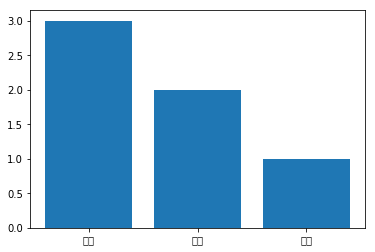

In [11]:
# bar 그래프 연습
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)	# X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)  	# X축의 위치, 각 x의 라벨
plt.show()

In [12]:
# 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
!ls /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 147 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ub

In [0]:
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
	
mpl.rcParams['axes.unicode_minus'] = False
	
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

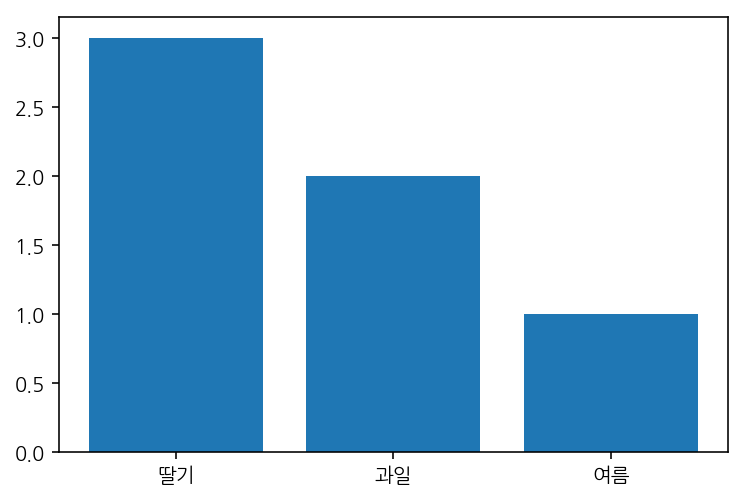

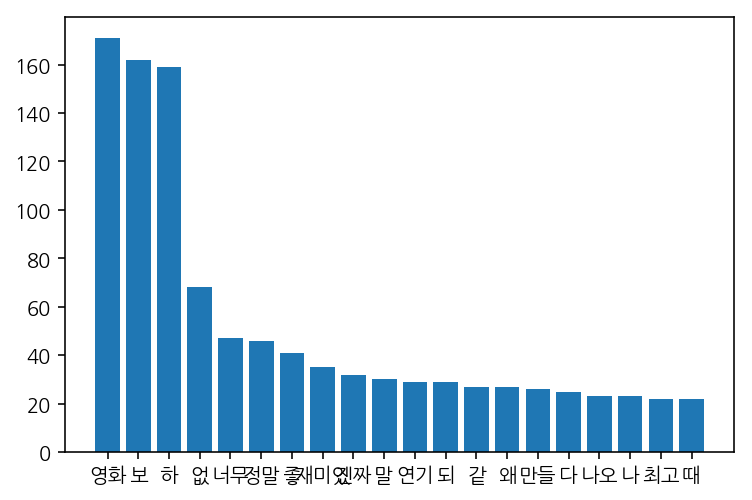

In [14]:
# 그래프 그리기 1
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)	# X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)  	# X축의 위치, 각 x의 라벨
plt.show()


# 그래프 그리기 2
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

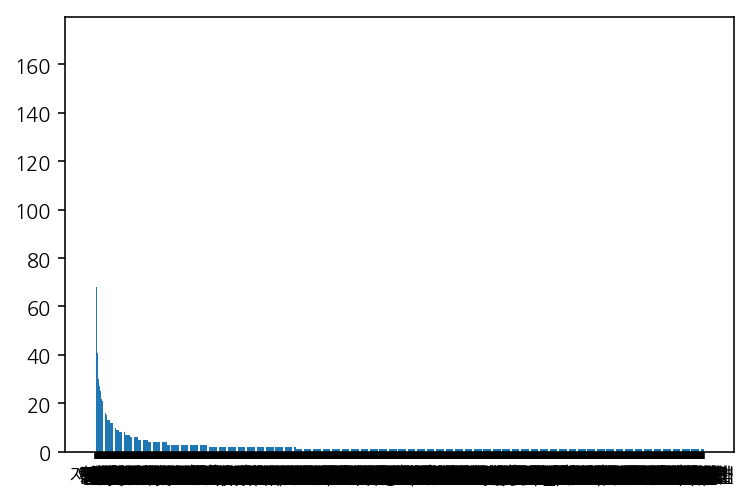

In [15]:
# 전체 데이터 그래프

sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo)), sorted_values)
plt.xticks(range(len(wordInfo)), sorted_keys)
plt.show()


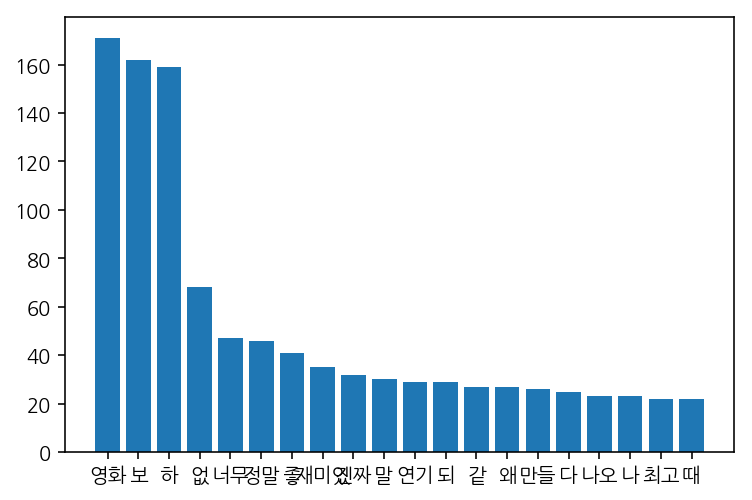

In [16]:
# 일부 데이터만 다시 출력
import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()